In [13]:
from docarray import Document, DocumentArray
import finetuner
da = DocumentArray.from_files('../colorshort/*/*.*')


train_da = da


artifact = "/home/praful/PicSearch/util_modules/gazo/jina/finetuned_model/trusting-chaplygin.zip"
IMAGE_ENCODER = finetuner.get_model(artifact=artifact, select_model='clip-vision')
TEXT_ENCODER = finetuner.get_model(artifact=artifact, select_model='clip-text')

finetuner.encode(model=IMAGE_ENCODER, data=train_da)


query = "this is a photo of scarlet ibis orange tshirt"
query_docs = DocumentArray([Document(content=query)])

finetuner.encode(model=TEXT_ENCODER, data=query_docs)
# find top 3 matches
query_docs.match(train_da, metric='cosine', limit=5)

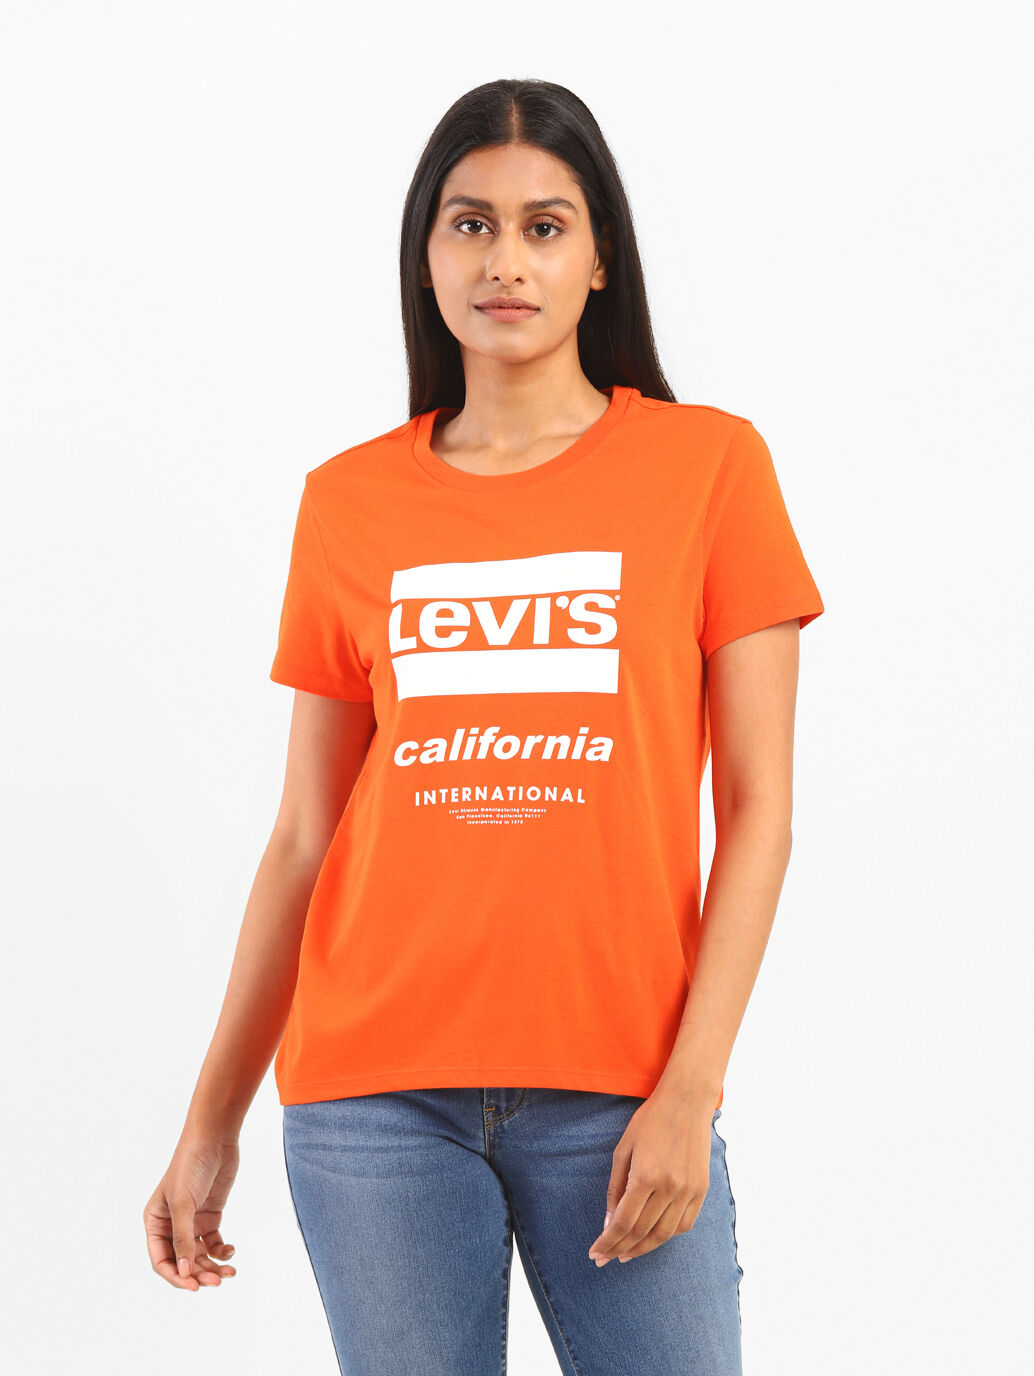

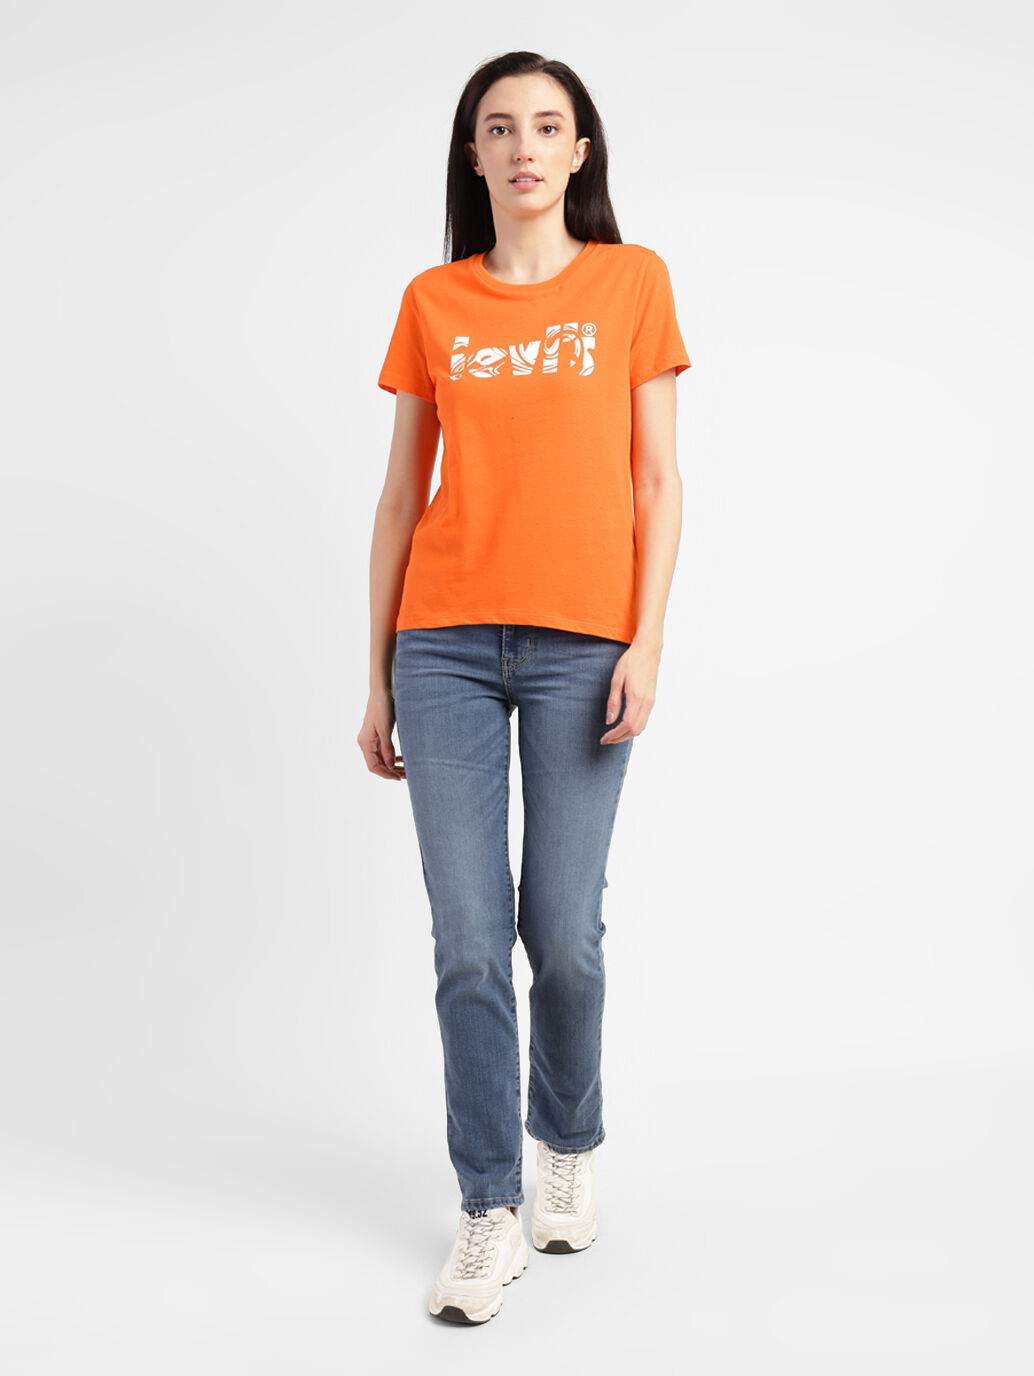

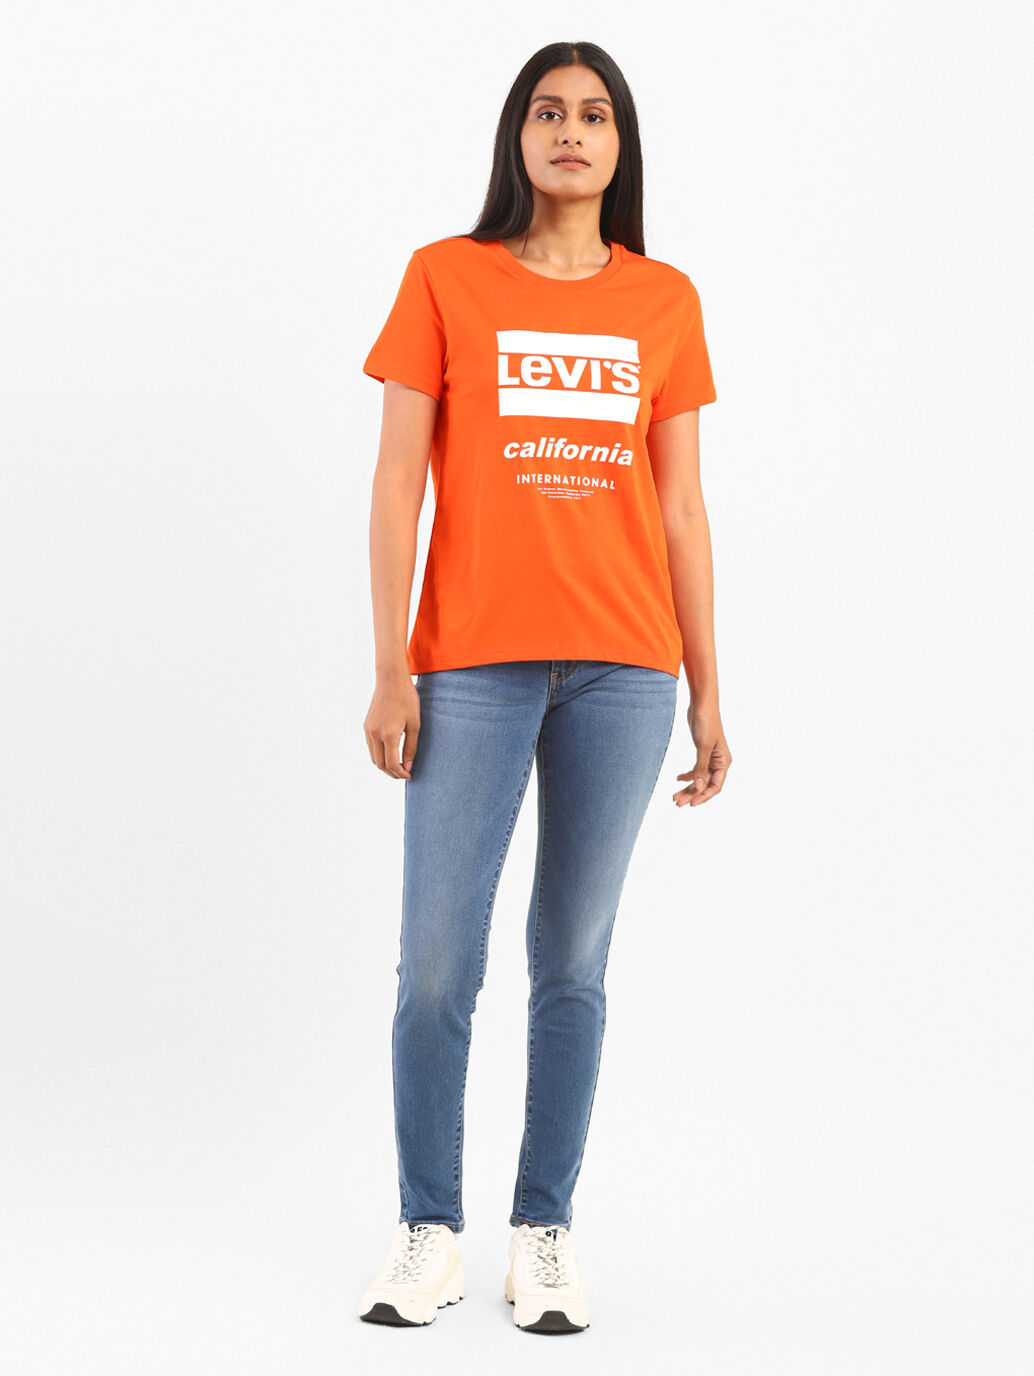

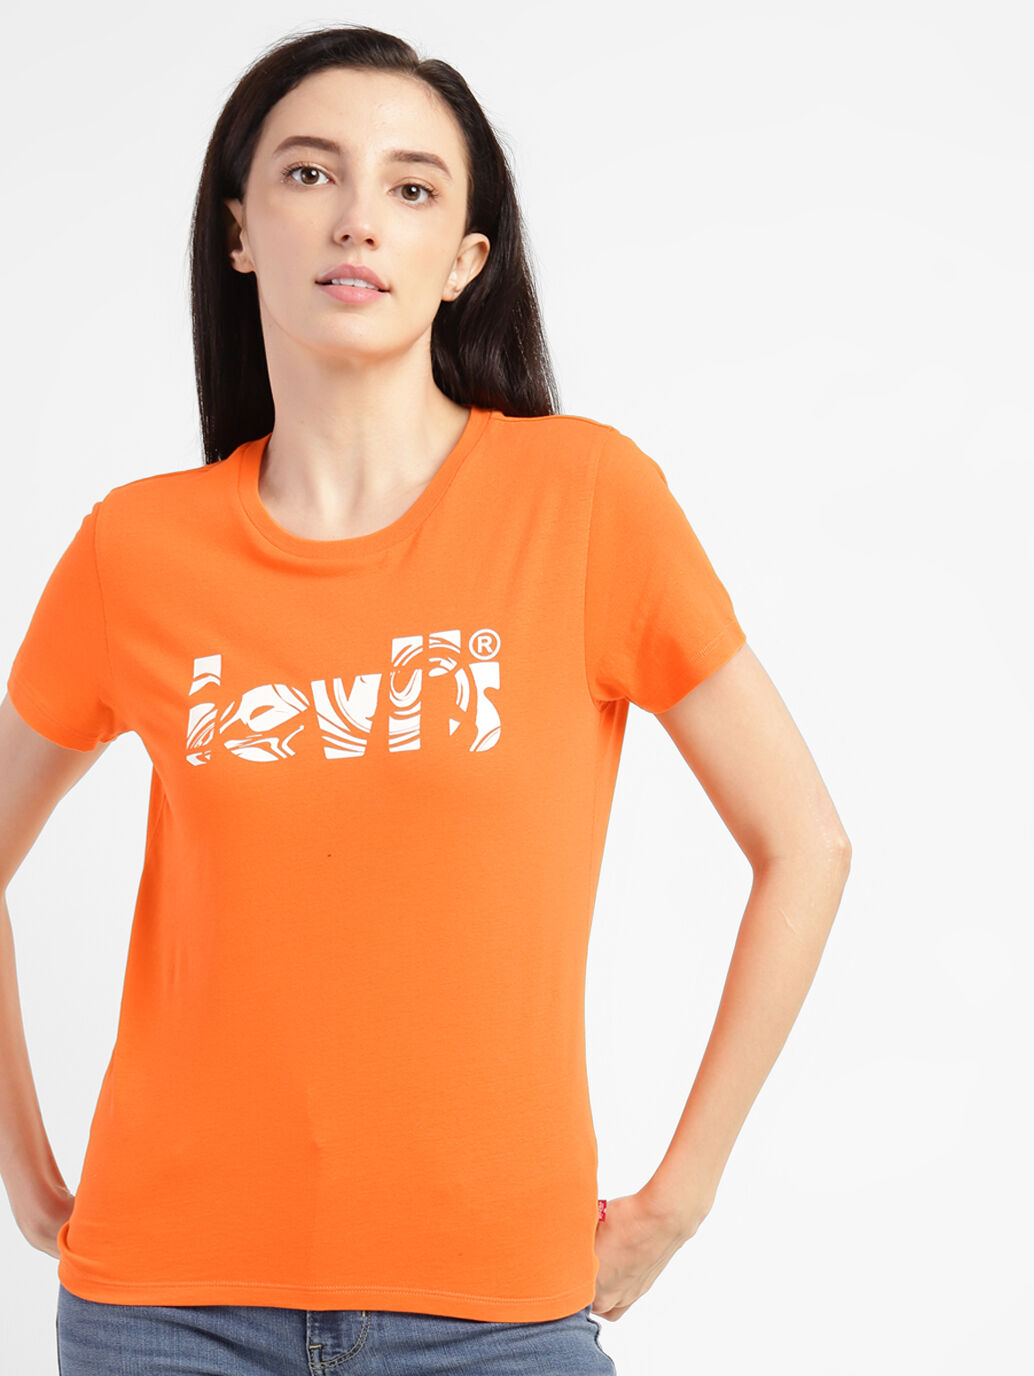

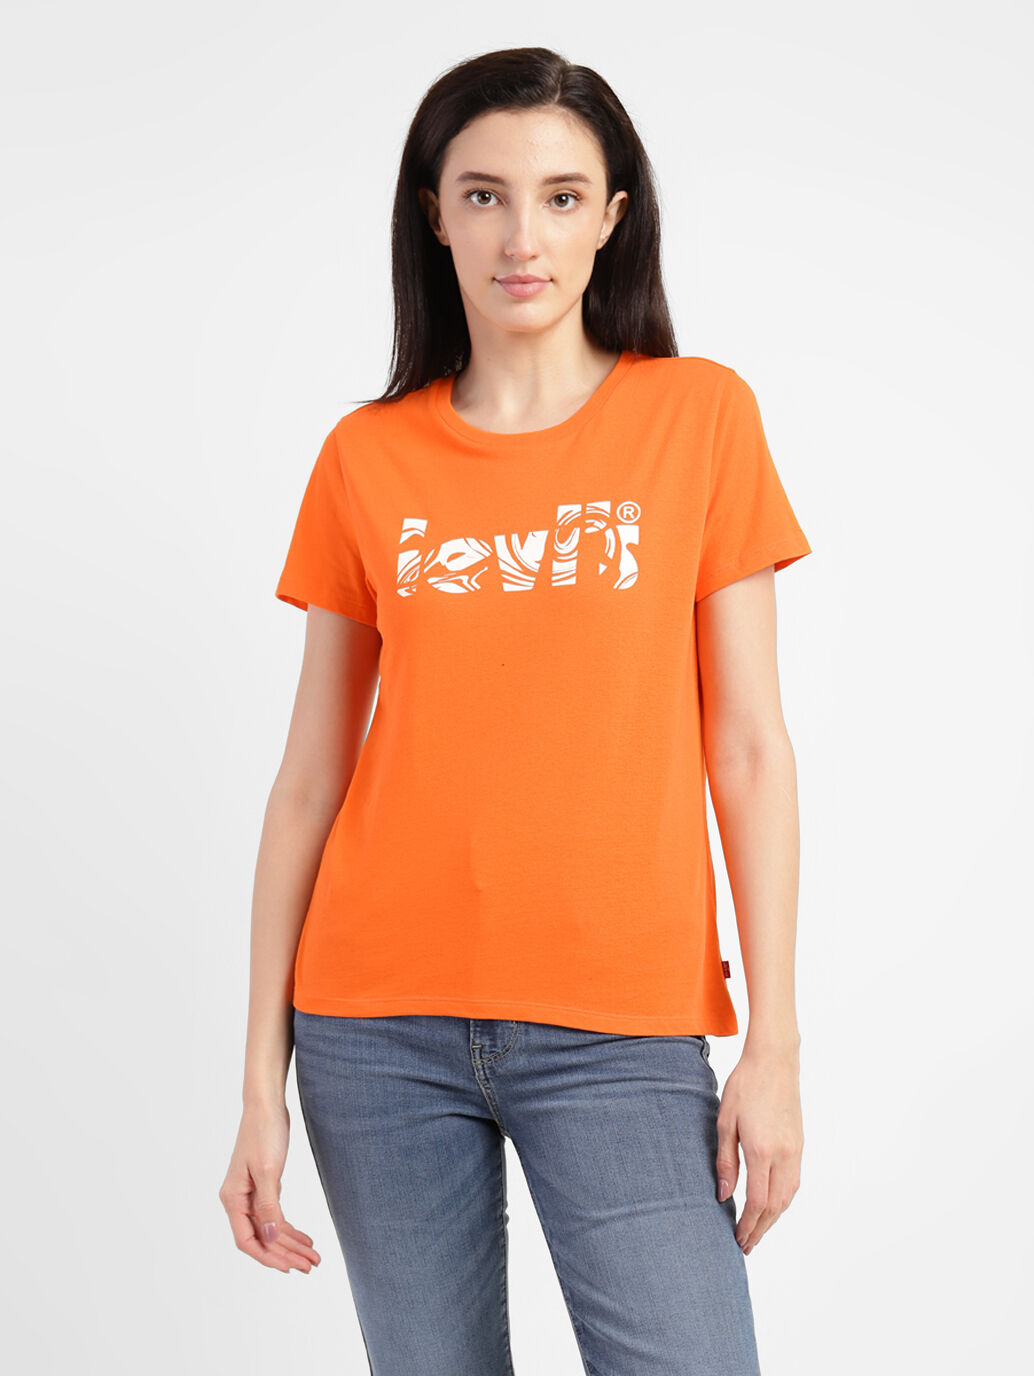

In [14]:
# plot matches
for idx, match in enumerate(query_docs[0].matches):

    #print(f'The matched document again query \033[1m{query}\033[0m at position \033[1m{idx}\033[0m is \033[1m{match.tags["finetuner_label"]}\033[0m')
    match.display()